In [9]:
import pickle
import music21

In [10]:
filename = './output.pickle'

with open(filename, 'rb') as f:
    tick = pickle.load(f)

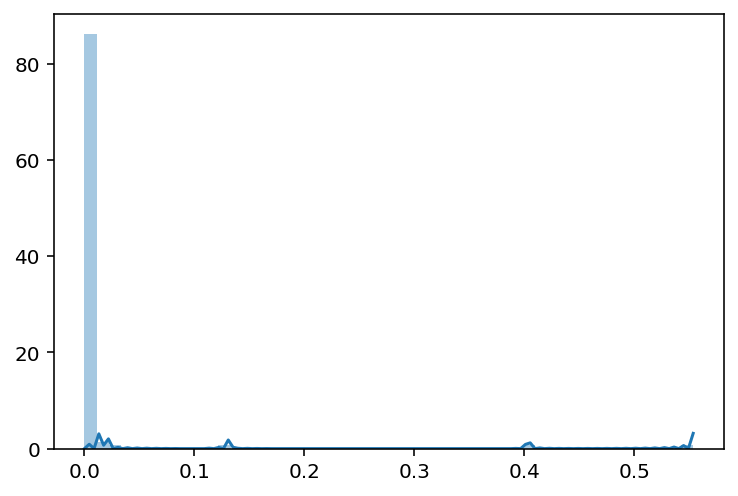

In [11]:
import seaborn as sns

sns.distplot(tick)

In [12]:
tick

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.94069672e-08,
        1.19209290e-07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.78813934e-07,
        0.00000000e+00, 1.19209290e-07, 5.03659248e-06, 1.04010105e-05,
        5.85913658e-05, 0.00000000e+00, 2.08616257e-07, 0.00000000e+00,
        0.00000000e+00, 2.92897224e-04, 0.00000000e+00, 4.93526459e-05,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.55326653e-06,
        1.19209290e-07, 1.19209290e-07, 4.14550304e-05, 2.980232

In [13]:
np.sort(tick)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [5]:
import numpy as np
import pandas as pd
from tensorflow.keras.backend import eval


def leave_n_notes(tick, max_n_notes_to_leave):
    '''
    Leaves a number of notes to be played in a tick by taking the ones with the highest probability
    Can be used to shrink down a piano state with many notes to just a chord of a few notes
    or to a melody of one note. 
    Ideally should be applied before upsampling of a tick back to x16 length
    '''
    tick = pd.DataFrame(tick.T)
    sorted_tick = tick.sort_values(by=0)
    played_inds = sorted_tick.tail(max_n_notes_to_leave).index
    display(played_inds)
    tick.iloc[tick.index.difference(played_inds)] = 0
    return tick
    
    
def leave_notes_above_threshold(tick, threshold=0.1, n_notes_to_leave=None):
    '''
    Leaves any number of notes in a given tick to be played above a threshold.
    Ideally should be applied before upsampling of a tick back to x16 length.
    Can use n_notes_to_leave to limit the number of output notes to be played to some maximum.
    Returns a binarized tick where 1 are played notes and 0 are unplayed notes. 
    '''
    tick = np.array(tick).copy()
    if n_notes_to_leave != None:
        tick = leave_n_notes(tick, n_notes_to_leave).T
    binarized_tick = np.where(tick > threshold, 1, 0)
    return binarized_tick



def upsample(tick, factor=16):
    '''augment a single tick or a complete sequence by a factor (default x16)'''
    if type(tick) == 'tensorflow.python.framework.ops.Tensor':
        tick = tick.eval()
    print(type(tick))
    return np.repeat(tick, factor, axis=0)


In [6]:
leave_notes_above_threshold(tick, 0.5)

NameError: name 'tick' is not defined

In [16]:
upsample(tick).shape

<class 'numpy.ndarray'>


(16, 128)

In [17]:
test = np.random.uniform(0, 1, (100, 128))

In [18]:
upsample(test)[2]

<class 'numpy.ndarray'>


array([0.23463939, 0.17105744, 0.97533797, 0.12255361, 0.8662829 ,
       0.32372246, 0.84689311, 0.64322709, 0.37304589, 0.89655058,
       0.18337331, 0.07984744, 0.13224433, 0.87883774, 0.12321963,
       0.54536378, 0.46686687, 0.85775138, 0.74523241, 0.73992952,
       0.5936314 , 0.29793673, 0.8993621 , 0.13814412, 0.46113799,
       0.7230499 , 0.29914066, 0.09385107, 0.20801646, 0.74598339,
       0.97968023, 0.37694589, 0.69980363, 0.57125869, 0.58514951,
       0.79331558, 0.95361866, 0.40424925, 0.2993312 , 0.01856892,
       0.07153994, 0.36413169, 0.91714225, 0.09523316, 0.49832688,
       0.23107282, 0.47645614, 0.56176938, 0.94745339, 0.71652009,
       0.98063002, 0.43617156, 0.79554978, 0.84674846, 0.39876636,
       0.02682094, 0.34536927, 0.76945753, 0.36068245, 0.89834436,
       0.82143076, 0.20260584, 0.112272  , 0.35266496, 0.26157336,
       0.94449611, 0.91009067, 0.27577895, 0.33587412, 0.86646689,
       0.99955916, 0.32078168, 0.68245272, 0.49624859, 0.34210

In [19]:
for i in {}:
    print(i)

In [20]:
set([1, 2, 3]) - set([2, 3, 4])

{1}

In [1]:
import mido

DEFAULT_VELOCITY = 80
TICKS_PER_BEAT = 480
FILENAME = './output.mid'

def seq_to_mid(seq, filename=FILENAME, verbose=False):
    '''
    Translating a binarized sequence to midi messages and returns a mido MidiFile object. 
    Writes the midi sequence to a file.
    '''
    
    track = mido.MidiTrack()
    midi = mido.MidiFile()
    midi.ticks_per_beat = TICKS_PER_BEAT
    
    seq_length = len(seq)
    
    # time for memorizing the time-delta since last written midi message 
    delta = 0
    
    # initial state of the piano on the first tick
    previously_played_notes = np.argwhere(seq[0])
    
    # creating initial state in the beginning of the midi part
    for note in previously_played_notes:
        msg = mido.Message('note_on', note=note, velocity=DEFAULT_VELOCITY, time=0)  
        track.append(msg)
        
        
    # going over each tick and checking what is being played and what isn't
    for current_time in range(1, seq_length):
        currently_played_notes = np.argwhere(seq[current_time])

        delta += 1
        
        # figuring out which notes stopped and which new notes started playing by comparing adjacent ticks
        stopped_notes = set(previously_played_notes.ravel()) - set(currently_played_notes.ravel())
        new_notes = set(currently_played_notes.ravel()) - set(previously_played_notes.ravel())
        
        # creating stop-notes messages
        for note in stopped_notes:
            msg = mido.Message('note_off', note=note, velocity=DEFAULT_VELOCITY, time=delta)
            if verbose == True:
                print(msg)
            track.append(msg)
            delta = 0
            
        # crating play-notes messages
        for note in new_notes:
            msg = mido.Message('note_on', note=note, velocity=DEFAULT_VELOCITY, time=delta)
            if verbose == True:
                print(msg)
            track.append(msg)
            delta = 0
            
        # remembering for next iteration
        previously_played_notes = currently_played_notes.copy()
    
    midi.tracks.append(track)
    
## TEST NOTE    
#     msg = mido.Message('note_on', note=100, velocity=3, time=6)
#     track2 = mido.MidiTrack()
#     track2.append(msg)
#     midi.tracks.append(track2)
    
    midi.save(filename)

    return midi    

In [79]:
def save_midi(midi, filename):
    '''
    Saves a MidiFile object to file
    '''
    midi.save(filename)

In [3]:
from tensorflow.keras.backend import eval
import pickle

filename = './full_midi.pkl'

with open(filename, 'rb') as f:
    seq = pickle.load(f)

seq

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
upsampled = upsample(seq, 160)

<class 'numpy.ndarray'>


In [9]:
seq_to_mid(upsampled)

<midi file None type 1, 1 tracks, 5368 messages>

In [70]:
msg = mido.Message('note_on', note=100, velocity=3, time=6)
midi = mido.MidiFile()
track = mido.MidiTrack()
track.append(msg)
midi.tracks.append(track)
midi.save('./test.mid')